# Applied Machine Learning: Assignment \#11

### Sheetal Parikh
EN.605.631.81<br>
April 19, 2021
***
***

## Problem 1
*In this assignment, we will use Apriori analysis to find noun phrases, or interesting patterns in a novel. Use the nltk library corpus gutenberg API and load the novel 'carroll-alice.txt' which is the Alice in Wonderland by L. Carroll. There are 1703 sentences in the novel which can be represented as 1703 transactions. Use any means to parse/extract words and save in CSV format to be read by Weka framework similar to the Apriori Analysis module.*

*Use FPGrowth and start with default parameters. Reduce lowerBoundMinSupport to reach to a sweet point for the support and avoid exploding the number of rules generated.Report interesting patterns. (Example: Some of the frequently occurring phrases are Mock Turtle, White Rabbit, etc.)*

In [1]:
from collections import defaultdict
import csv
from itertools import combinations 
import numpy as np
import nltk
from nltk.corpus import gutenberg, stopwords
import matplotlib.pyplot as plt
import re

#downloading packages
nltk.download('punkt')
nltk.download('gutenberg')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sheetal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\Sheetal\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sheetal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
#viewing the various text selections
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [3]:
#checking the number of sentences
alice_sentences = gutenberg.sents('carroll-alice.txt')
len(alice_sentences)

1703

In [4]:
alice_sentences

[['[', 'Alice', "'", 's', 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', '1865', ']'], ['CHAPTER', 'I', '.'], ...]

In [5]:
#import re
Stop_words = stopwords.words('english')
phrases = []
#to use for checking word frequencies
phrases_2 = []
for terms in alice_sentences:
     # Remove stop words
    terms = [w for w in terms if w not in Stop_words]
    # Remove non-words and short words
    terms = [w for w in terms if re.search(r'[A-Za-z]{2}', w) is not None]
    
    phrases.append(terms)
    phrases_2.extend(terms)

#view phrases
display(phrases[:8])

[['Alice', 'Adventures', 'Wonderland', 'Lewis', 'Carroll'],
 ['CHAPTER'],
 ['Down', 'Rabbit', 'Hole'],
 ['Alice',
  'beginning',
  'get',
  'tired',
  'sitting',
  'sister',
  'bank',
  'nothing',
  'twice',
  'peeped',
  'book',
  'sister',
  'reading',
  'pictures',
  'conversations',
  'use',
  'book',
  'thought',
  'Alice',
  'without',
  'pictures',
  'conversation'],
 ['So',
  'considering',
  'mind',
  'well',
  'could',
  'hot',
  'day',
  'made',
  'feel',
  'sleepy',
  'stupid',
  'whether',
  'pleasure',
  'making',
  'daisy',
  'chain',
  'would',
  'worth',
  'trouble',
  'getting',
  'picking',
  'daisies',
  'suddenly',
  'White',
  'Rabbit',
  'pink',
  'eyes',
  'ran',
  'close'],
 ['There',
  'nothing',
  'VERY',
  'remarkable',
  'Alice',
  'think',
  'VERY',
  'much',
  'way',
  'hear',
  'Rabbit',
  'say',
  'Oh',
  'dear'],
 ['Oh', 'dear'],
 ['shall', 'late']]

As we can see above, the word "CHAPTER" is included in the list. This is a word I would like to remove later on as it is wouldn't be included in any interesting phrases.  Also, we can see that some words are capitalized and some are lowercase.  It will be better to make all words lowercase since some stop words may have been missed.  We can then take a look at the most frequent words included in the sentences.

In [6]:
#check top most frequent words 
freqdist = nltk.FreqDist(phrases_2)
freqdist.most_common(45)

[('said', 456),
 ('Alice', 396),
 ('little', 125),
 ('The', 108),
 ('one', 94),
 ('know', 87),
 ('like', 84),
 ('went', 83),
 ('thought', 74),
 ('Queen', 74),
 ('could', 73),
 ('would', 70),
 ('time', 68),
 ('And', 67),
 ('see', 66),
 ('It', 64),
 ('King', 61),
 ('Turtle', 59),
 ('began', 58),
 ('way', 56),
 ('Mock', 56),
 ('Hatter', 55),
 ('Gryphon', 55),
 ('quite', 53),
 ('much', 51),
 ('say', 51),
 ('You', 51),
 ('think', 50),
 ('head', 50),
 ('thing', 49),
 ('go', 47),
 ('voice', 47),
 ('Rabbit', 45),
 ('looked', 45),
 ('got', 45),
 ('get', 44),
 ('first', 44),
 ('never', 42),
 ('What', 42),
 ('Duchess', 42),
 ('must', 41),
 ('round', 41),
 ('well', 40),
 ('came', 40),
 ('tone', 40)]

We can see above that I missed a few common words such as "And" wasn't removed since it was capitalized. We will need to go through the list and make all the words lowercase and remove the stop words again.  I also want to remove other common words that probably wouldn't be included in an interesting phrase.  I will remove: said, one, thought, would, It, say, You, think, and like.  

In [7]:
#words to remove
Stop_words2 = ['said', 'one', 'thought', 'could', 'would', 'It', 'say', 'You', 'think', 'CHAPTER', 'like']
phrases2 = []
phrases_2 = []
for terms in phrases:
     # Remove unimportant words
    terms = [w for w in terms if w not in Stop_words2]
    #make all words lowercase
    terms = [w.lower() for w in terms]
    #remove stop words
    terms = [w for w in terms if w not in Stop_words]
    
    phrases2.append(terms)
    phrases_2.extend(terms)

#display
display(phrases2[:8])

[['alice', 'adventures', 'wonderland', 'lewis', 'carroll'],
 [],
 ['rabbit', 'hole'],
 ['alice',
  'beginning',
  'get',
  'tired',
  'sitting',
  'sister',
  'bank',
  'nothing',
  'twice',
  'peeped',
  'book',
  'sister',
  'reading',
  'pictures',
  'conversations',
  'use',
  'book',
  'alice',
  'without',
  'pictures',
  'conversation'],
 ['considering',
  'mind',
  'well',
  'hot',
  'day',
  'made',
  'feel',
  'sleepy',
  'stupid',
  'whether',
  'pleasure',
  'making',
  'daisy',
  'chain',
  'worth',
  'trouble',
  'getting',
  'picking',
  'daisies',
  'suddenly',
  'white',
  'rabbit',
  'pink',
  'eyes',
  'ran',
  'close'],
 ['nothing',
  'remarkable',
  'alice',
  'much',
  'way',
  'hear',
  'rabbit',
  'oh',
  'dear'],
 ['oh', 'dear'],
 ['shall', 'late']]

In [8]:
#checking frequent words again
freqdist2 = nltk.FreqDist(phrases_2)
freqdist2.most_common(45)

[('alice', 398),
 ('little', 128),
 ('know', 88),
 ('went', 83),
 ('queen', 75),
 ('time', 71),
 ('see', 67),
 ('well', 63),
 ('king', 63),
 ('turtle', 59),
 ('began', 58),
 ('way', 56),
 ('hatter', 56),
 ('mock', 56),
 ('quite', 55),
 ('gryphon', 55),
 ('rabbit', 51),
 ('much', 51),
 ('first', 51),
 ('head', 50),
 ('go', 50),
 ('thing', 49),
 ('never', 48),
 ('voice', 48),
 ('get', 46),
 ('come', 46),
 ('oh', 45),
 ('looked', 45),
 ('got', 45),
 ('must', 44),
 ('mouse', 44),
 ('duchess', 42),
 ('round', 41),
 ('came', 40),
 ('two', 40),
 ('tone', 40),
 ('dormouse', 40),
 ('great', 39),
 ('back', 39),
 ('cat', 37),
 ('nothing', 34),
 ('march', 34),
 ('large', 33),
 ('last', 33),
 ('found', 32)]

We can see that all the stop words were removed. As shown in the Module 10 notebook, we can now use the technique of denormalization so that the data can be used in Weka.

In [9]:
#denormalization
#using code from module 10 notebook

Transactions_list = []  # a list of transactions
Items_names = {}  # Lookup item ID to name
Items_ids = {}  # Lookup item name to ID

Items = None  # a list of item IDs, normally an increasing sequence of numbers

# Process the data
item_id = 0
for terms in phrases2:
    transaction = []
    
    for word in terms:
        if word not in Items_ids:
            Items_ids[word] = item_id
            Items_names[item_id] = word
            item_id += 1
            #
        transaction += [Items_ids[word]]
        #
    Transactions_list += [transaction]

M, N = len(Items_ids), len(Transactions_list)

Items = np.arange(0,M)

# Information
print(f'M={M} items, N={N} transactions')

M=2415 items, N=1703 transactions


In [10]:
# Sanity check
print([Items_names[_] for _ in Items[0:7]])
print(Transactions_list[:7])

['alice', 'adventures', 'wonderland', 'lewis', 'carroll', 'rabbit', 'hole']
[[0, 1, 2, 3, 4], [], [5, 6], [0, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 11, 17, 18, 19, 20, 16, 0, 21, 18, 22], [23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 5, 44, 45, 46, 47], [13, 48, 0, 49, 50, 51, 5, 52, 53], [52, 53]]


In [11]:
#using code from module 10 notebook

# Convert to numpy arrays
Transactions = np.full((N,M), False, dtype=np.bool)

for i, t in enumerate(Transactions_list):
    for word in t:
        Transactions[i][word] = True

# Sanity, print row index 10, 11
print(f'{Transactions[:12].astype(int)}')

[[1 1 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [12]:
#using code from module 10 notebook

#creating csv file so can be imported into weka
Filename = 'alicePhrases_weka.csv'

with open(Filename, 'w') as fout:
    writer = csv.writer(fout, delimiter=',', quoting=csv.QUOTE_ALL, quotechar="'", lineterminator='\n')
    writer.writerow([Items_names[i] for i in range(M)])
    for i in range(N):
        writer.writerow(list(map(lambda x: '' if x == False else 'True',  Transactions[i])))

### Settings of Weka FPGrowth

#### 0.002 lowerBoundMinSupport:
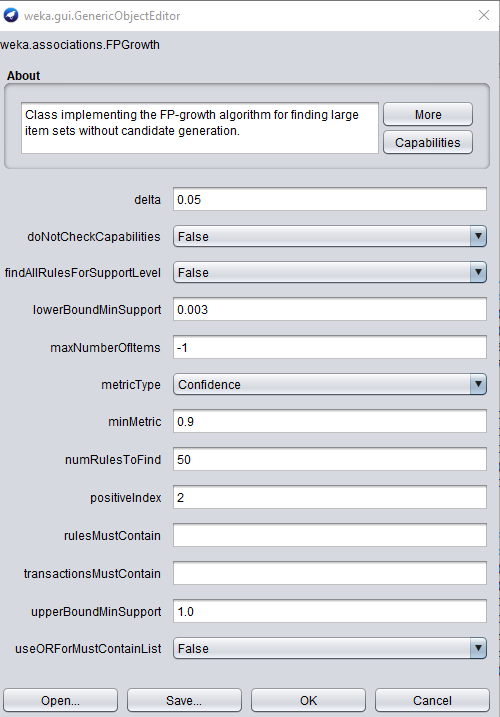

#### 0.003 lowerBoundMinSupport
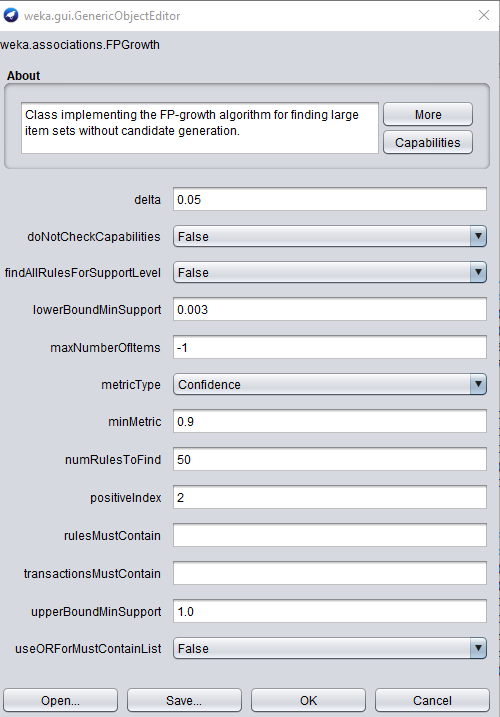

I tried various settings of the lowerBoundMinSupport: 0.01, 0.001, 0.0001, 0.02, 0.001, 0.0002, 0.03, 0.003, 0.0003, 0.005, 0.006. The settings of 0.0001, 0.0002 and 0.0003 would make Weka crash.  The best settings appears to be 0.003 which narrowed down the 154 rules found in the 0.002 support to 24 rules.

#### Rules found with 0.002 lowerBoundSupport:

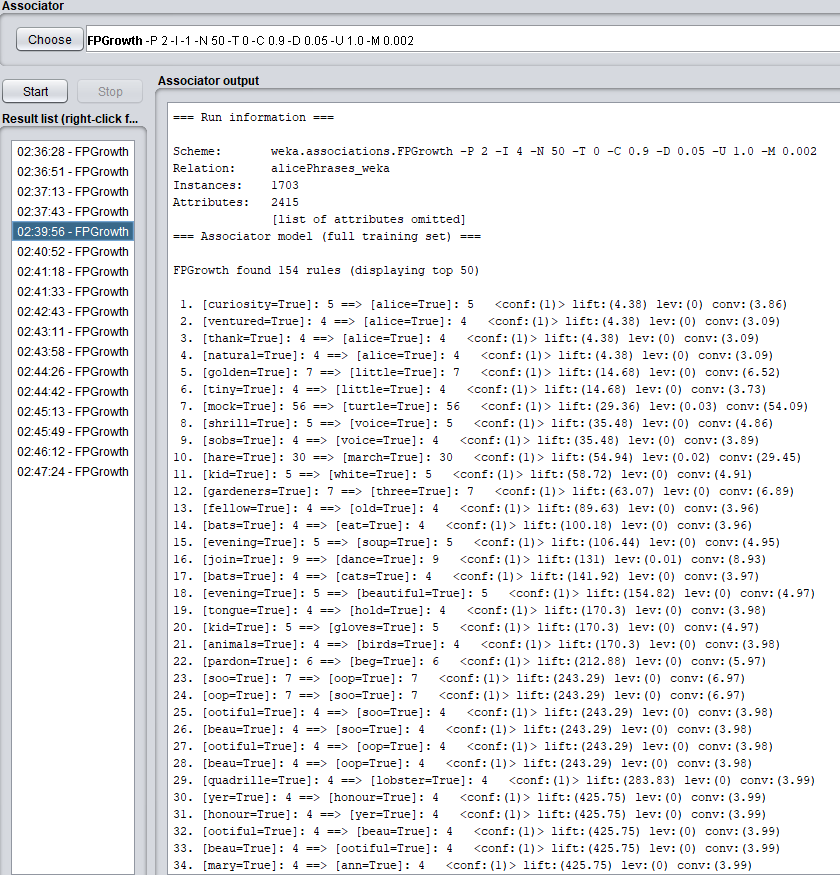

#### Rules found with 0.003 lowerBoundMinSupport:

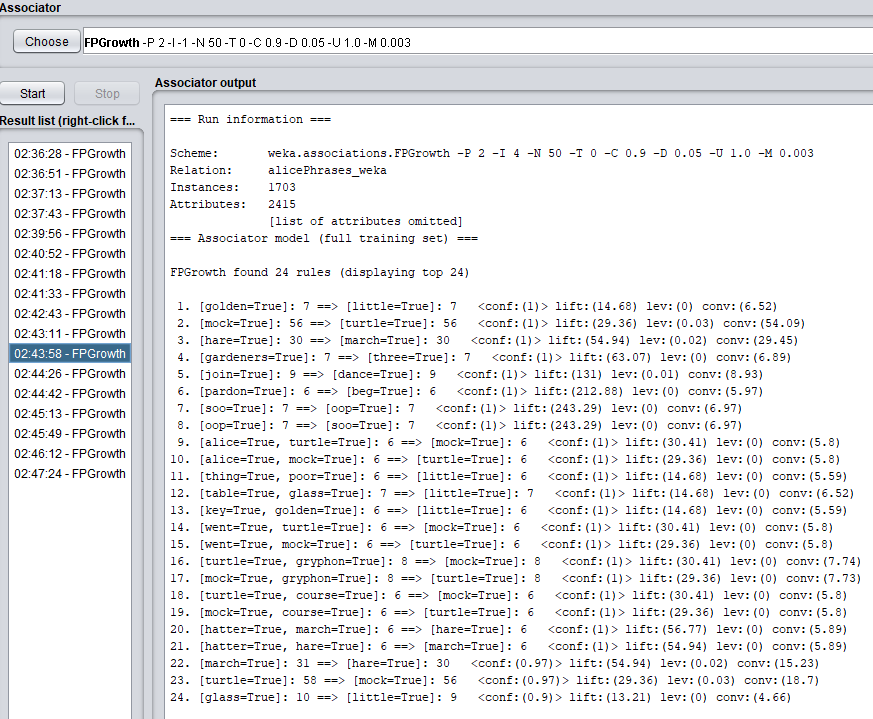

As can be seen above, some of the top phrases are characters from Alice in Wonderland such as Mock Turtle, March Hare and Three Gardeners, and Gryphon.  Also, we see important items in the book such as the little golden key and lyrics from the turtle soup song that Mock Turtle sings, "Soo-oop".  I was expecting more phrases with the word Alice included. However, I did see more phrases with Alice from the results of using 0.002 lowerBoundMinSupport.  Also, in my results I didn't see White Rabbit.  Most of my results seem to be involved with the either Mock Turtle or the March Hare.

***
## Problem 2
*In the lecture module, the class NeuralNetMLP is a single hidden layer neural network implementation. Make the necessary modifications to upgrade it to a 2 hidden layer network. Run it on the MNIST dataset and report its performance.*

In [13]:
#checking current directory
#print(os.getcwd() + "\n")

# change the current directory 
# to specified directory 
#os.chdir(r"C:\Users\Sheetal\Documents\Sheetal")  

#setting path
path = 'C:/Users/Sheetal/Documents/Sheetal/datasets/'

In [14]:
#loading the data as per module 11 notebook

def load_mnist(path, kind='train'):
    from numpy import fromfile, uint8
    import os
    import struct
    
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte' % kind)
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II', lbpath.read(8))
        labels = fromfile(lbpath, dtype=uint8)
        with open(images_path, 'rb') as imgpath:
            magic, num, rows, cols = struct.unpack(">IIII",imgpath.read(16))
            images = fromfile(imgpath, dtype=uint8).reshape(len(labels), 784)
            images = ((images / 255.) - .5) * 2
    #
    return images, labels

X_train, y_train = load_mnist(path, kind='train')
print(f'Rows= {X_train.shape[0]}, columns= {X_train.shape[1]}')

X_test, y_test = load_mnist(path, kind='t10k')
print(f'Rows= {X_test.shape[0]}, columns= {X_test.shape[1]}')

Rows= 60000, columns= 784
Rows= 10000, columns= 784


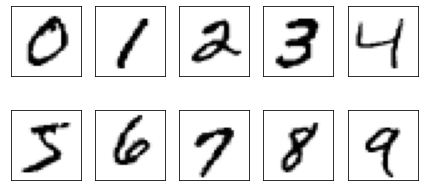

In [15]:
#visualizing the first digit of each class to make sure we are reading in the correct files.

#code from module 11 notebook 
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(10):
    img = X_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    plt.tight_layout()
plt.show()

In [16]:
#adding a 2nd hidden layer to the MLP classifier from scratch code from module 11 notebook

from numpy import random, zeros, exp, clip, dot, log, sum, argmax, unique, arange, float
    
class NeuralNetMLP(object):
    def __init__(self, n_hidden_1= 30 , n_hidden_2 = 30, epochs=100, eta=0.001, minibatch_size=1, seed=None):
        self.random = random.RandomState(seed)  # used to randomize weights
        self.n_hidden_1 = n_hidden_1  # size of the hidden layer1 - number of neurons - default 30
        self.n_hidden_2 = n_hidden_2  # size of the hidden layer2 - number of neurons - default 30
        self.epochs = epochs  # number of iterations
        self.eta = eta  # learning rate
        self.minibatch_size = minibatch_size  # size of training batch - 1 would not work
    
    @staticmethod
    def onehot(y, n_classes):  # one hot encode the input class y
        onehot = zeros((n_classes, y.shape[0]))
        for idx, val in enumerate(y.astype(int)):
            onehot[val, idx] = 1.0
        return onehot.T
    
    @staticmethod
    def sigmoid(z):  # Eq 1
        return 1.0 / (1.0 + exp(-clip(z, -250, 250)))

    def _forward(self, X):  # Eq 2
        z_h1 = dot(X, self.w_h1)  #hidden layer 1
        a_h1 = self.sigmoid(z_h1) #hidden layer 1
        z_h2 = dot(a_h1, self.w_h2)  #hidden layer 2
        a_h2 = self.sigmoid(z_h2) #hidden layer 2
        z_out = dot(a_h2, self.w_out) #output
        a_out = self.sigmoid(z_out) #output
        return z_h1, a_h1, z_h2, a_h2, z_out, a_out

    @staticmethod
    def compute_cost(y_enc, output):  # Eq 4
        term1 = -y_enc * (log(output))
        term2 = (1.0-y_enc) * log(1.0-output)
        cost = sum(term1 - term2)
        return cost

    def predict(self, X):
        z_h1, a_h1, z_h2, a_h2, z_out, a_out = self._forward(X)
        y_pred = argmax(z_out, axis=1)
        return y_pred

    def fit(self, X_train, y_train, X_valid, y_valid):
        import sys
        n_output = unique(y_train).shape[0]  # number of class labels
        n_features = X_train.shape[1]
        self.w_out = self.random.normal(loc=0.0, scale=0.1, size=(self.n_hidden_2, n_output))
        self.w_h2 = self.random.normal(loc=0.0, scale=0.1, size=(self.n_hidden_1, self.n_hidden_2))
        self.w_h1 = self.random.normal(loc=0.0, scale=0.1, size=(n_features, self.n_hidden_1))

        y_train_enc = self.onehot(y_train, n_output)  # one-hot encode original y
        for i in range(self.epochs):
            indices = arange(X_train.shape[0])
            for start_idx in range(0, indices.shape[0] - self.minibatch_size + 1, self.minibatch_size):
                batch_idx = indices[start_idx:start_idx + self.minibatch_size]
                z_h1, a_h1, z_h2, a_h2, z_out, a_out = self._forward(X_train[batch_idx])
                sigmoid_derivative_h1 = a_h1 * (1.0-a_h1)  # Eq 3
                sigmoid_derivative_h2 = a_h2 * (1.0-a_h2)  # Eq 3
                delta_out = a_out - y_train_enc[batch_idx]  # Eq 5
                delta_h2 = (dot(delta_out, self.w_out.T) * sigmoid_derivative_h2)  # Eq 6
                delta_h1 = (dot(delta_h2, self.w_h2.T) * sigmoid_derivative_h1)  # Eq 6
                grad_w_out = dot(a_h2.T, delta_out)  # Eq 7
                grad_w_h2 = dot(a_h1.T, delta_h2)  # Eq 8
                grad_w_h1 = dot(X_train[batch_idx].T, delta_h1)  # Eq 8
                self.w_out -= self.eta*grad_w_out  # Eq 9
                self.w_h2 -= self.eta*grad_w_h2  # Eq 9
                self.w_h1 -= self.eta*grad_w_h1  # Eq 9
            # Evaluation after each epoch during training
            z_h1, a_h1, z_h2, a_h2, z_out, a_out = self._forward(X_train)
            cost = self.compute_cost(y_enc=y_train_enc, output=a_out)
            y_train_pred = self.predict(X_train)  # monitoring training progress through reclassification
            y_valid_pred = self.predict(X_valid)  # monitoring training progress through validation
            train_acc = ((sum(y_train == y_train_pred)).astype(float) / X_train.shape[0])
            valid_acc = ((sum(y_valid == y_valid_pred)).astype(float) / X_valid.shape[0])
            sys.stderr.write('\r%d/%d | Cost: %.2f ' '| Train/Valid Acc.: %.2f%%/%.2f%% '%
                (i+1, self.epochs, cost, train_acc*100, valid_acc*100))
            sys.stderr.flush()
        #
        return self

In [17]:
%%time
from sklearn.metrics import confusion_matrix

nn = NeuralNetMLP(n_hidden_1=20, n_hidden_2=20, epochs=300, eta=0.0005, minibatch_size=100, seed=1)

nn.fit(X_train=X_train[:55000], y_train=y_train[:55000], X_valid=X_train[55000:], y_valid=y_train[55000:]) ;

300/300 | Cost: 7190.22 | Train/Valid Acc.: 98.25%/95.96%  

Wall time: 9min 13s


In [18]:
%%time
y_pred = nn.predict(X_test)
test_acc = ((sum(y_test == y_pred)).astype(float) / y_test.shape[0])

print(f'Accuracy= {test_acc*100:.2f}%')
print(confusion_matrix(y_test,y_pred))

Accuracy= 95.04%
[[ 950    0    0    1    4    6   14    2    3    0]
 [   0 1105    5    1    0    2    5    4   13    0]
 [   5    4  978   14    4    3    4    7   13    0]
 [   2    1   17  960    1    9    2    7    8    3]
 [   1    0    3    0  944    0    9    2    7   16]
 [  10    1    3   32    1  802   10    3   23    7]
 [   7    2    3    1    9   10  921    0    5    0]
 [   1    3   19   10    5    2    0  978    1    9]
 [   6    1    3   11    4    9    5    3  925    7]
 [   6    4    0   10   27    2    0    8   11  941]]
Wall time: 108 ms


The 2 hidden layer implementation of the neural network model has an improved performance accuracy of about 95% compared to the 94% accuracy from the 1 hidden layer model from the module 11 notebook.  Overall the cost reduced from about 15500 from the module 11 notebook to about 7200 however it is even more likely that there is overfitting since there is a larger gap between the training accuracy and validation accuracy.  The difference between the training and validation accuracy was about 0.71 in the 1 hidden layer neural network but it increased to 2.29 with the 2 hidden layer implementation.

***
## References

https://www.nltk.org/book/ch02.html

https://widdowquinn.github.io/Teaching-SWC-Lessons/python/2017-05-18-standrews/extras/nltk_example.html

https://gist.github.com/caseyanderson/1ebeef23d7638e05d6044d8eab126325

https://silversurfer0.github.io/project/2017/10/04/word_frequency.html

https://stackoverflow.com/questions/59387777/python-list-does-not-have-isalpha

https://machinelearningmastery.com/clean-text-machine-learning-python/

https://www3.ntu.edu.sg/home/ehchua/programming/howto/Regexe.html

https://stackoverflow.com/questions/522563/accessing-the-index-in-for-loops/28072982

https://www.kaggle.com/rbiasuz/alice-s-text-analysis

https://levelup.gitconnected.com/coding-a-deep-neural-network-from-scratch-17bbc507e7c0

Raschka, Sebastian. Python Machine Learning: Machine Learning and Deep Learning with Python, scikit-learn, and TensorFlow 2, 3rd Edition (p. 46). Packt Publishing. Kindle Edition. 
